In [51]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [52]:
def func_2(x):
    return math.sin(x) + 1

In [53]:
def func_1(x):
    return math.sin(x) + 1

In [54]:
def plot(x, y):
    plt.plot(x, y)
    plt.grid(True)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

In [55]:
def cross_corelation_element(
        array_1: np.ndarray,
        array_2: np.ndarray,
        lag: int) -> float:
    """
    При отрицательном lag
    становится меньше размера одного из исходных массивов на
    значение lag, что не позволяет выйти за пределы второго массива.
    """
    last_index = 0
    if lag < 0:
        last_index = len(array_1) + lag
    else:
        last_index = len(array_1)

    """
    При положительном сдвиге данное условие
    заставляет оператор суммирования начать не с первого элемента
    массивов, а с 1 + lag, поскольку иначе будут перемножаться не
    перекрывающиеся элементы. Для первого массива всегда будут взяты
    элементы, начиная с первого.
    """
    begin_index = 1
    if lag > 0:
        begin_index = lag + 1

    result = []
    for i in range(begin_index, last_index):
        result.append(array_1[i] * array_2[i - lag])
    return sum(result)

In [56]:
def lags(array):
    return np.arange(-len(array), len(array), 1, dtype=int)

In [66]:
def cross_corelation(
        array_1: np.ndarray,
        array_2: np.ndarray) -> list:
    result = []
    for lag in lags(array_1):
        result.append(cross_corelation_element(array_1, array_2, lag))
    return result

In [69]:
def auto_corelation(
    array: np.ndarray
) -> list:
    return cross_corelation(array, array)

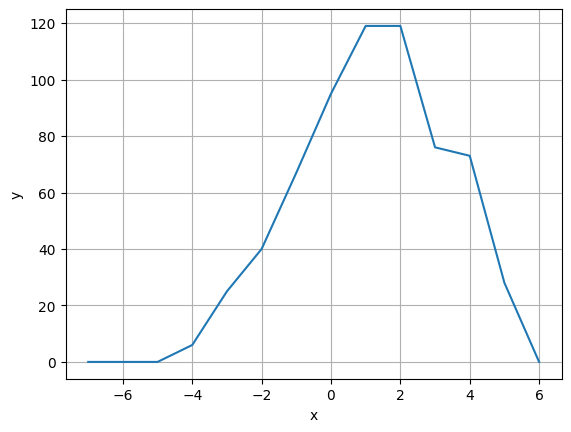

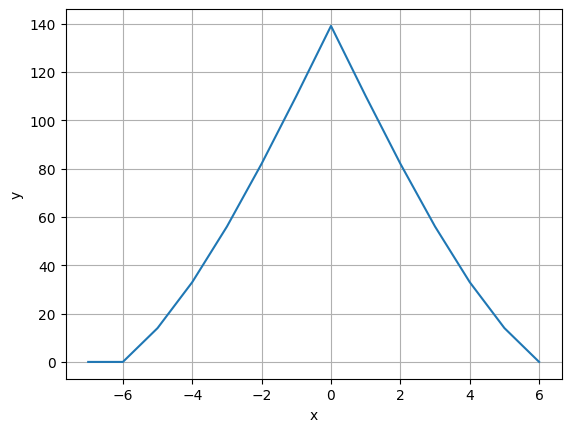

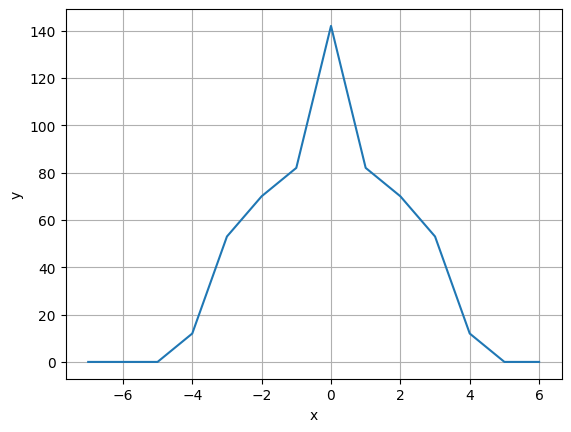

In [73]:
x = np.linspace(-10, 10, 100)
y_1 = [func_1(value) for value in x]
y_2 = [func_1(value) for value in x]
y_1 = [1, 2, 3, 4, 5, 6, 7]
y_2 = [2, 4, 7, 2, 8, 3, 0]
cc = cross_corelation(y_1, y_2)
plot(lags(y_1), cc)
plot(lags(y_1), auto_corelation(y_1))
plot(lags(y_2), auto_corelation(y_2))